## Problem Statement
1) Build and submit a deep learning based Image classification model on 100 scrapped Images (for each category) from amazon for the below categories :                          
>> 1) Sarees  (women) (100 images)                        
>> 2) Tshirts (men) (100 images)                   
>> 3) Shirts (men) (100 images)  

2) Use Opencv for Data Augmentation    

## Importing Libraries

In [1]:
# Importing Useful Libraries

import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from keras.models import load_model

import os
from os import listdir
import cv2
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

# Loading Directories

In [2]:
# Loading Train directory
train_data_dir='./Garments/train'

# Loading Test Directory
validation_data_dir='./Garments/test'


# Loading Some Scrapped Image Samples

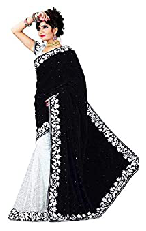

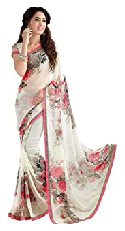

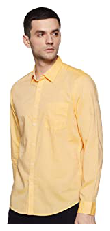

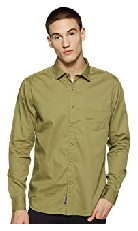

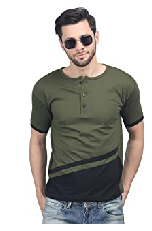

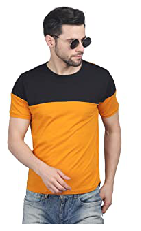

In [3]:
# Sample images which I have scrapped from amazon
import matplotlib.image as mpimg
Saree_train='./Garments/train/Saree'
Shirt_train='./Garments/train/Shirt'
Tshirt_train='./Garments/train/Tshirt'

Dir_train=[Saree_train, Shirt_train, Tshirt_train]
for dirs in Dir_train:
    k=listdir(dirs)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(dirs,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Data Augmentation

In [4]:
# Performing Data Augmentation using OpenCV on the scrapped images

for dirs in Dir_train:
    
    if dirs==Saree_train:
        print("\nPerforming Augmentation operations on Saree images\n")
    elif dirs==Tshirt_train:
        print("\nPerforming Augmentation operations on Tshirt images \n")
    elif dirs==Shirt_train:
        print("\nPerforming Augmentation operations on Shirt images\n")
        
    for i in listdir(dirs):
        print("Input Image is: ",i)
        input_image=cv2.imread('{}/{}'.format(dirs,i))
        input_image = cv2.resize(input_image, (320, 320), interpolation = cv2.INTER_AREA)
        print("Shape of the image is: ",input_image.shape)
        
        # Splitting up the filename
        fold=i.split('_')
        
        # Rotating images
        height,width=input_image.shape[:2]
        rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),30,.5)
        rotated_image=cv2.warpAffine(input_image,rotation_matrix,(width,height))
        
        # Deciding folder to save the image
        if fold[0]=="Shirt":
            cv2.imwrite('./Garments/train/Shirt/{}_Rot.jpg'.format(i),rotated_image)
            cv2.imwrite('./Garments/Aug_img/Shirt/{}_Rot.jpg'.format(i),rotated_image)
        elif fold[0]=="Saree":
            cv2.imwrite('./Garments/train/Saree/{}_Rot.jpg'.format(i),rotated_image)
            cv2.imwrite('./Garments/Aug_img/Saree/{}_Rot.jpg'.format(i),rotated_image)
        elif fold[0]=="Tshirt":
            cv2.imwrite('./Garments/train/Tshirt/{}_Rot.jpg'.format(i),rotated_image)
            cv2.imwrite('./Garments/Aug_img/Tshirt/{}_Rot.jpg'.format(i),rotated_image)
    
        # Horizontal Flipping of the images
        flip=cv2.flip(input_image,1)
        if fold[0]=="Shirt":
            cv2.imwrite('./Garments/train/Shirt/{}_flip.jpg'.format(i),flip)
            cv2.imwrite('./Garments/Aug_img/Shirt/{}_flip.jpg'.format(i),flip)
        elif fold[0]=="Saree":
            cv2.imwrite('./Garments/train/Saree/{}_flip.jpg'.format(i),flip)
            cv2.imwrite('./Garments/Aug_img/Saree/{}_flip.jpg'.format(i),flip)
        elif fold[0]=="Tshirt":
            cv2.imwrite('./Garments/train/Tshirt/{}_flip.jpg'.format(i),flip)
            cv2.imwrite('./Garments/Aug_img/Tshirt/{}_flip.jpg'.format(i),flip)
    
        # Brightness Increase
        m=np.ones(input_image.shape,dtype="uint8")*75
        Added=cv2.add(input_image,m)
        if fold[0]=="Shirt":
            cv2.imwrite('./Garments/train/Shirt/{}_incr.jpg'.format(i),Added)
            cv2.imwrite('./Garments/Aug_img/Shirt/{}_incr.jpg'.format(i),Added)
        elif fold[0]=="Saree":
            cv2.imwrite('./Garments/train/Saree/{}_incr.jpg'.format(i),Added)
            cv2.imwrite('./Garments/Aug_img/Saree/{}_incr.jpg'.format(i),Added)
        elif fold[0]=="Tshirt":
            cv2.imwrite('./Garments/train/Tshirt/{}_incr.jpg'.format(i),Added)
            cv2.imwrite('./Garments/Aug_img/Tshirt/{}_incr.jpg'.format(i),Added)
    
        # Brightness Decrease
        Subtract=cv2.subtract(input_image,m)
        if fold[0]=="Shirt":
            cv2.imwrite('./Garments/train/Shirt/{}_decr.jpg'.format(i),Subtract)
            cv2.imwrite('./Garments/Aug_img/Shirt/{}_decr.jpg'.format(i),Subtract)
        elif fold[0]=="Saree":
            cv2.imwrite('./Garments/train/Saree/{}_decr.jpg'.format(i),Subtract)
            cv2.imwrite('./Garments/Aug_img/Saree/{}_decr.jpg'.format(i),Subtract)
        elif fold[0]=="Tshirt":
            cv2.imwrite('./Garments/train/Tshirt/{}_decr.jpg'.format(i),Subtract)
            cv2.imwrite('./Garments/Aug_img/Tshirt/{}_decr.jpg'.format(i),Subtract)

        # Sharpening Images
        kernel_sharpening=np.array([[-1,-1,-1],
                                    [-1,10,-1],
                                    [-1,-1,-1]])
        sharpened=cv2.filter2D(input_image,-1,kernel_sharpening)
        if fold[0]=="Shirt":
            cv2.imwrite('./Garments/train/Shirt/{}_sharp.jpg'.format(i),sharpened)
            cv2.imwrite('./Garments/Aug_img/Shirt/{}_sharp.jpg'.format(i),sharpened)
        elif fold[0]=="Saree":
            cv2.imwrite('./Garments/train/Saree/{}_sharp.jpg'.format(i),sharpened)
            cv2.imwrite('./Garments/Aug_img/Saree/{}_sharp.jpg'.format(i),sharpened)
        elif fold[0]=="Tshirt":
            cv2.imwrite('./Garments/train/Tshirt/{}_sharp.jpg'.format(i),sharpened)
            cv2.imwrite('./Garments/Aug_img/Tshirt/{}_sharp.jpg'.format(i),sharpened)
    


Performing Augmentation operations on Saree images

Input Image is:  Saree_img_10.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_11.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_110.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_111.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_112.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_113.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_114.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_115.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_116.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_117.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_118.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_119.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_12.jpeg
Shape of the image is:  (3

# Displaying some Augmented Images

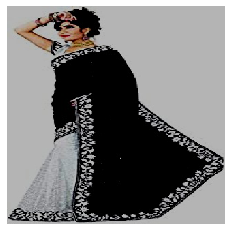

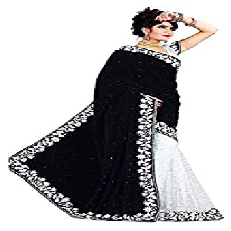

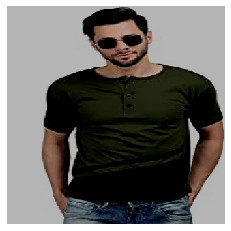

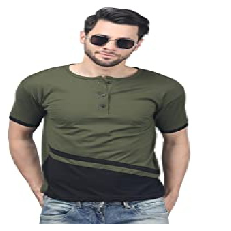

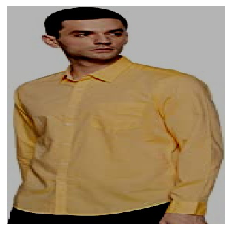

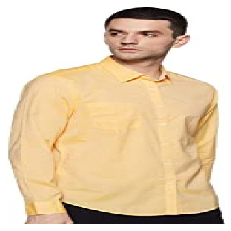

In [5]:
# Some Samples of Augmented Images
Saree_Aug='./Garments/Aug_img/Saree'
Tshirt_Aug='./Garments/Aug_img/Tshirt'
Shirt_Aug='./Garments/Aug_img/Shirt'

Dir_Aug=[Saree_Aug,Tshirt_Aug,Shirt_Aug]
for new_dir in Dir_Aug:
    k=listdir(new_dir)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(new_dir,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [6]:
# Defining Dimensions for the image to be input and then loading the images
input_shape=(320,320,3)
img_width=320
img_height=320
nb_train_samples=480
nb_validation_samples=20
batch_size=20
epoch=100


# Defining the Model

In [7]:
# Creating the model for predicting the image category
model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 318, 318, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 318, 318, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 159, 159, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 159, 159, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 157, 157, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 157, 157, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 78, 32)        0

# Preparing Data for Training

In [8]:
# Training Data Generator( Data Augmentation on Training Images)

train_generator_augmented=ImageDataGenerator(rescale=1./255)
train_generator=train_generator_augmented.flow_from_directory(train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')

# Validation Data Generator
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 1440 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


# Defining Early stopping and Model check point

In [9]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30,restore_best_weights=True)
MC = ModelCheckpoint('Garments.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fitting the data into the model

In [10]:
# Fitting the Training Data
history = model.fit_generator(
    train_generator, 
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size,
    callbacks=[ES,MC]
    
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
24/24 [==============================] - ETA: 0s - loss: 1.4407 - accuracy: 0.3854
Epoch 00001: val_accuracy improved from -inf to 0.45000, saving model to Garments.h5
24/24 [==============================] - 30s 1s/step - loss: 1.4407 - accuracy: 0.3854 - val_loss: 1.0864 - val_accuracy: 0.4500
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 1.0756 - accuracy: 0.4604
Epoch 00002: val_accuracy improved from 0.45000 to 0.55000, saving model to Garments.h5
24/24 [==============================] - 31s 1s/step - loss: 1.0756 - accuracy: 0.4604 - val_loss: 0.9980 - val_accuracy: 0.5500
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 0.8717 - accuracy: 0.6146
Epoch 00003: val_accuracy improved from 0.55000 to 0.85000, saving model to Garments.h5
24/24 [==============================] - 30s 1s/step - loss: 0.8717 - accuracy: 0.6146 - val_loss: 0.6242 - val_accuracy

# Evaluating Model

In [22]:
# Model Evaluation
evl=model.evaluate(validation_generator,steps=1)
print("Test Loss",evl[0])
print("Test Accuracy",evl[1])

1/1 [==============================] - 0s 964us/step - loss: 0.1422 - accuracy: 0.9500
Test Loss 0.14221680164337158
Test Accuracy 0.949999988079071


# Saving Best Model

In [12]:
# Saving the best model where val_accuracy is maximum.
model.save('Garments.h5')

In [13]:
# Printing History
losses = pd.DataFrame(history.history)
losses

loss  accuracy  val_loss  val_accuracy
0   1.440706  0.385417  1.086402          0.45
1   1.075553  0.460417  0.998006          0.55
2   0.871676  0.614583  0.624242          0.85
3   0.721826  0.689583  0.622546          0.75
4   0.618262  0.745833  0.507779          0.95
..       ...       ...       ...           ...
83  0.051525  0.979167  0.485553          0.90
84  0.044795  0.979167  2.570712          0.70
85  0.061409  0.977083  0.880655          0.90
86  0.031260  0.987500  4.325914          0.65
87  0.141956  0.981250  2.281379          0.75

[88 rows x 4 columns]

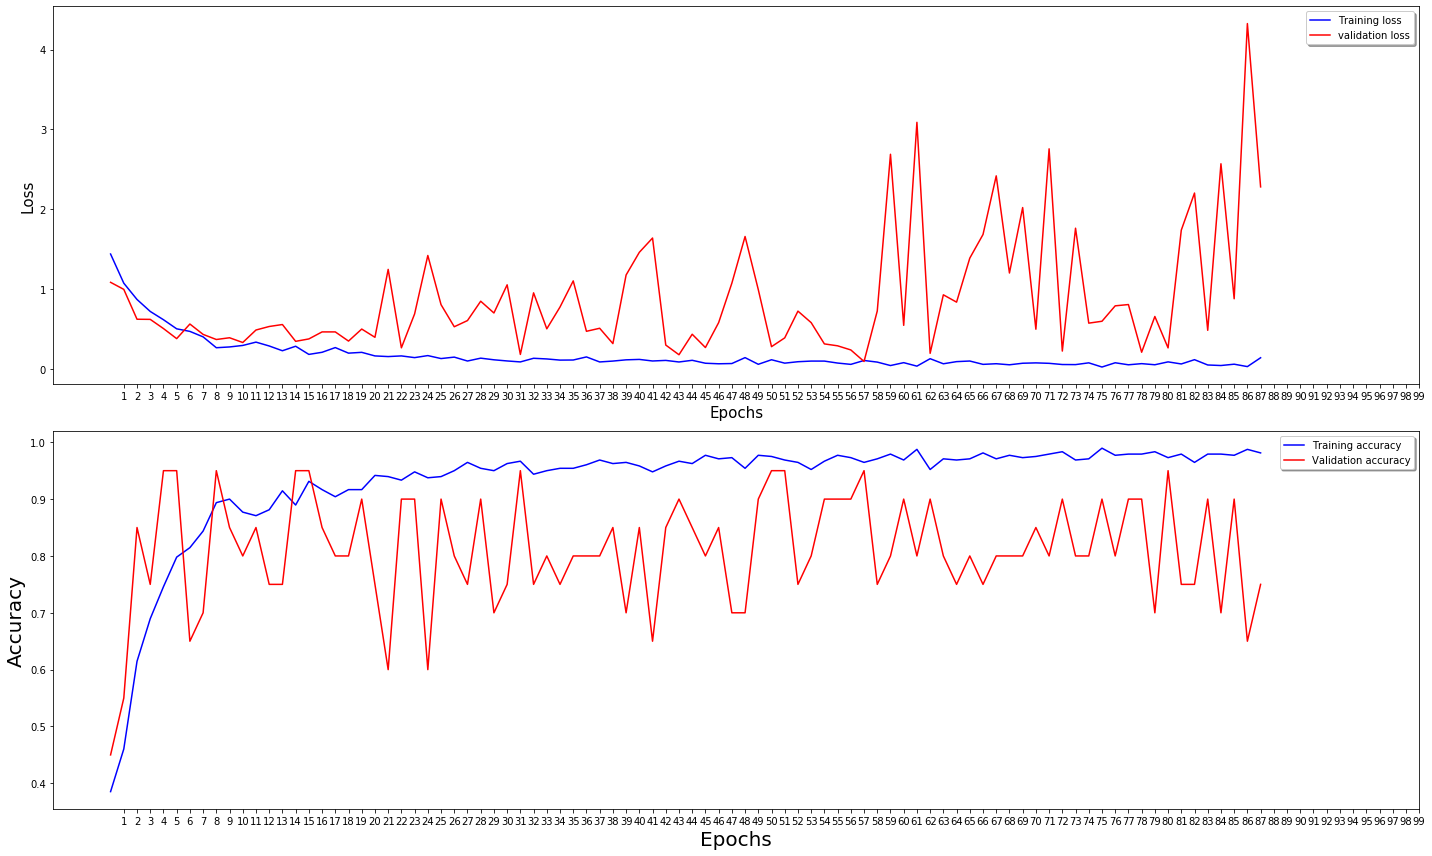

In [14]:
# Visualizing  Training
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epoch, 1),)
ax1.set_xlabel('Epochs' ,fontsize=15)
ax1.set_ylabel('Loss' ,fontsize=15)
ax1.legend(loc='best', shadow=True)

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xlabel('Epochs' ,fontsize=20)
ax2.set_ylabel('Accuracy' ,fontsize=20)
ax2.set_xticks(np.arange(1, epoch, 1))

ax2.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### As we can see that accuracy is increasing and losses are decreasing as number of epochs are increasing.

In [15]:
# As we can see that there are 3 classes for the 90 test images
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
# Lets load our model

saved_model = load_model('Garments.h5')

# Predicting the Images

Input Image is: Saree_img_231.jpeg


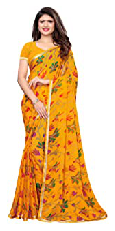

Predicted Label is: Saree

Input Image is: Saree_img_232.jpeg


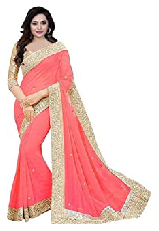

Predicted Label is: Saree

Input Image is: Saree_img_233.jpeg


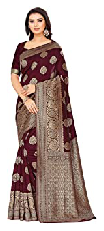

Predicted Label is: Saree

Input Image is: Saree_img_234.jpeg


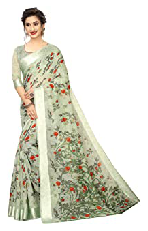

Predicted Label is: Saree

Input Image is: Saree_img_236.jpeg


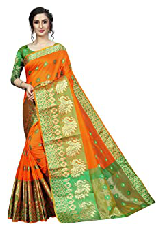

Predicted Label is: Saree

Input Image is: Saree_img_237.jpeg


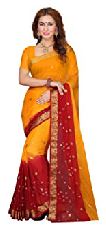

Predicted Label is: Saree

Input Image is: Saree_img_239.jpeg


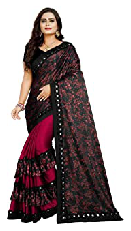

Predicted Label is: Saree

Input Image is: Saree_img_242.jpeg


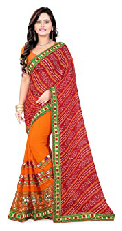

Predicted Label is: Saree

Input Image is: Saree_img_243.jpeg


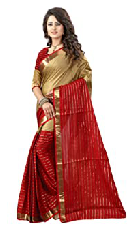

Predicted Label is: Saree

Input Image is: Saree_img_244.jpeg


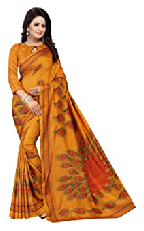

Predicted Label is: Saree

Input Image is: Saree_img_245.jpeg


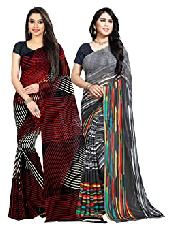

Predicted Label is: Saree

Input Image is: Saree_img_311.jpeg


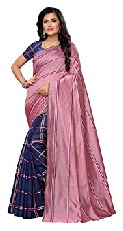

Predicted Label is: Saree

Input Image is: Saree_img_312.jpeg


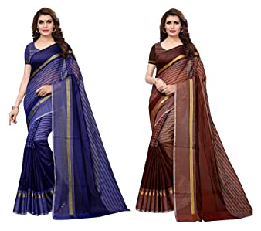

Predicted Label is: Saree

Input Image is: Saree_img_313.jpeg


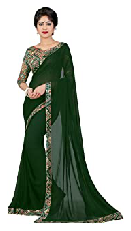

Predicted Label is: Saree

Input Image is: Saree_img_314.jpeg


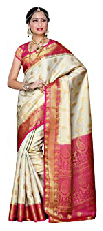

Predicted Label is: Saree

Input Image is: Saree_img_315.jpeg


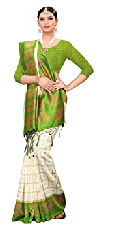

Predicted Label is: Saree

Input Image is: Saree_img_316.jpeg


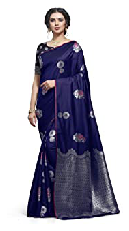

Predicted Label is: Saree

Input Image is: Saree_img_317.jpeg


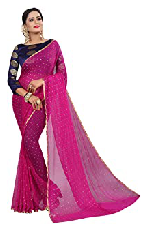

Predicted Label is: Saree

Input Image is: Saree_img_319.jpeg


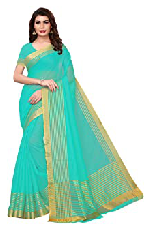

Predicted Label is: Saree

Input Image is: Saree_img_332.jpeg


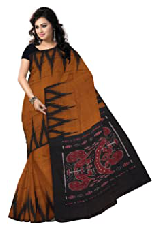

Predicted Label is: Saree

Input Image is: Shirt_img_229.jpeg


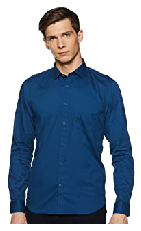

Predicted Label is: Shirt

Input Image is: Shirt_img_230.jpeg


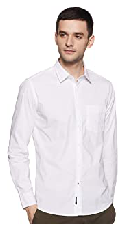

Predicted Label is: Shirt

Input Image is: Shirt_img_231.jpeg


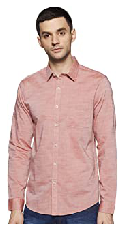

Predicted Label is: Shirt

Input Image is: Shirt_img_233.jpeg


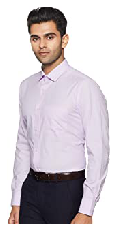

Predicted Label is: Shirt

Input Image is: Shirt_img_236.jpeg


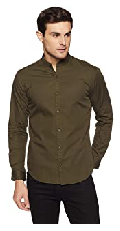

Predicted Label is: Shirt

Input Image is: Shirt_img_240.jpeg


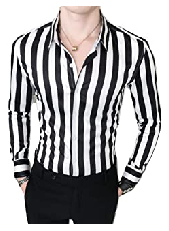

Predicted Label is: Saree

Input Image is: Shirt_img_245.jpeg


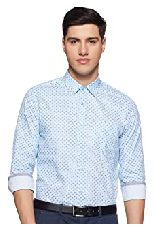

Predicted Label is: Shirt

Input Image is: Shirt_img_247.jpeg


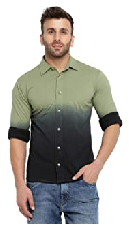

Predicted Label is: Shirt

Input Image is: Shirt_img_248.jpeg


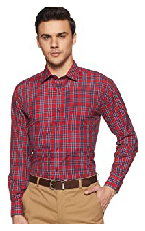

Predicted Label is: Shirt

Input Image is: Shirt_img_249.jpeg


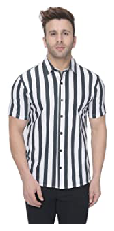

Predicted Label is: Shirt

Input Image is: Shirt_img_250.jpeg


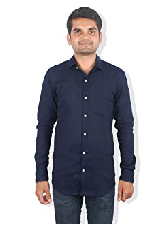

Predicted Label is: Tshirt

Input Image is: Shirt_img_251.jpeg


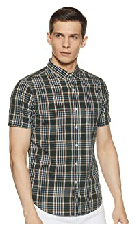

Predicted Label is: Shirt

Input Image is: Shirt_img_253.jpeg


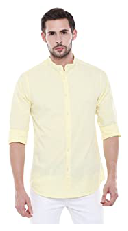

Predicted Label is: Shirt

Input Image is: Shirt_img_256.jpeg


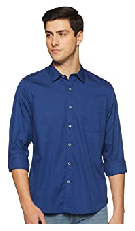

Predicted Label is: Shirt

Input Image is: Shirt_img_259.jpeg


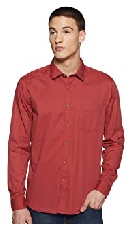

Predicted Label is: Shirt

Input Image is: Shirt_img_311.jpeg


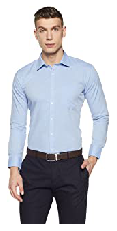

Predicted Label is: Shirt

Input Image is: Shirt_img_312.jpeg


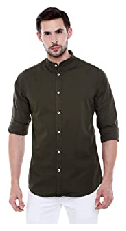

Predicted Label is: Shirt

Input Image is: Shirt_img_317.jpeg


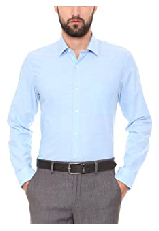

Predicted Label is: Shirt

Input Image is: Shirt_img_320.jpeg


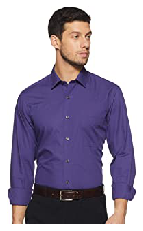

Predicted Label is: Shirt

Input Image is: Shirt_img_327.jpeg


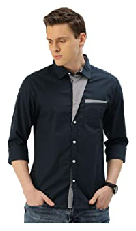

Predicted Label is: Shirt

Input Image is: Tshirt_img_154.jpeg


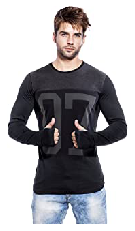

Predicted Label is: Tshirt

Input Image is: Tshirt_img_223.jpeg


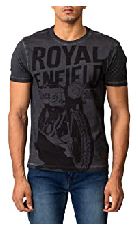

Predicted Label is: Tshirt

Input Image is: Tshirt_img_231.jpeg


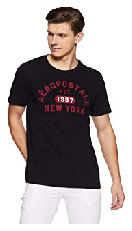

Predicted Label is: Tshirt

Input Image is: Tshirt_img_232.jpeg


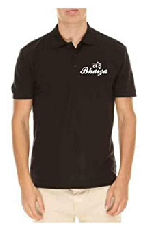

Predicted Label is: Tshirt

Input Image is: Tshirt_img_233.jpeg


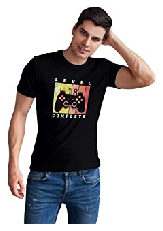

Predicted Label is: Tshirt

Input Image is: Tshirt_img_234.jpeg


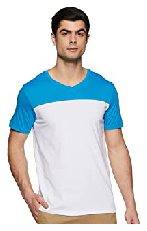

Predicted Label is: Shirt

Input Image is: Tshirt_img_236.jpeg


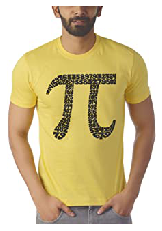

Predicted Label is: Tshirt

Input Image is: Tshirt_img_238.jpeg


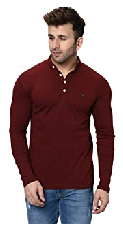

Predicted Label is: Tshirt

Input Image is: Tshirt_img_239.jpeg


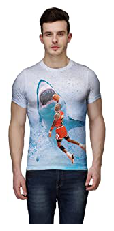

Predicted Label is: Shirt

Input Image is: Tshirt_img_250.jpeg


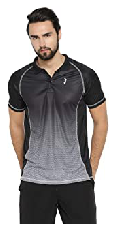

Predicted Label is: Shirt

Input Image is: Tshirt_img_254.jpeg


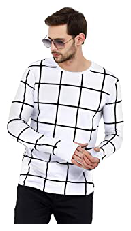

Predicted Label is: Shirt

Input Image is: Tshirt_img_325.jpeg


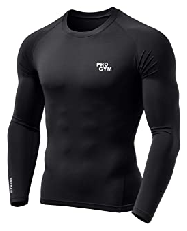

Predicted Label is: Shirt

Input Image is: Tshirt_img_326.jpeg


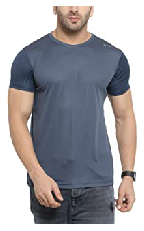

Predicted Label is: Tshirt

Input Image is: Tshirt_img_327.jpeg


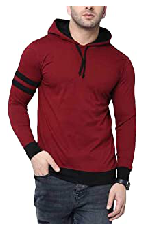

Predicted Label is: Tshirt

Input Image is: Tshirt_img_331.jpeg


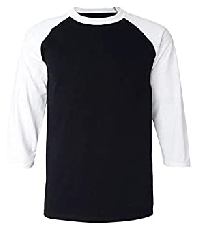

Predicted Label is: Tshirt

Input Image is: Tshirt_img_333.jpeg


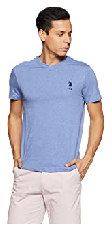

Predicted Label is: Shirt

Input Image is: Tshirt_img_347.jpeg


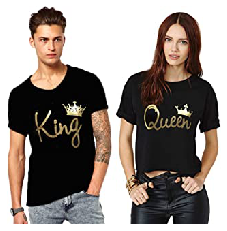

Predicted Label is: Tshirt

Input Image is: Tshirt_img_357.jpeg


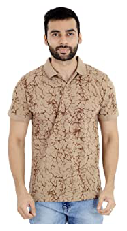

Predicted Label is: Tshirt

Input Image is: Tshirt_img_358.jpeg


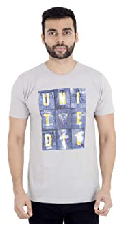

Predicted Label is: Tshirt

Input Image is: Tshirt_img_359.jpeg


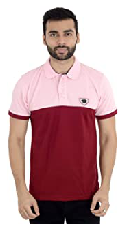

Predicted Label is: Tshirt



In [17]:
# Predicted samples of the test images
test_Saree='./Garments/test/Saree'
test_Shirt='./Garments/test/Shirt'
test_Tshirt='./Garments/test/Tshirt'

test_Dir=[test_Saree,test_Shirt,test_Tshirt,]
Predicted_class=[]
for test_dir in test_Dir:
    for i in listdir(test_dir):
        print("Input Image is:",i)
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(320, 320))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model.predict(test_image)
        final=np.argmax(result, axis=1)[0]
        if final==0:
            print("Predicted Label is: Saree\n")
            Predicted_class.append("Saree")
        elif final==1:
            print("Predicted Label is: Shirt\n")
            Predicted_class.append("Shirt")
        elif final==2:
            print("Predicted Label is: Tshirt\n")
            Predicted_class.append("Tshirt")
        
        

In [18]:
res = pd.DataFrame()
res['Predicted_Label']=Predicted_class
res['Actual_Label']=validation_generator.classes
res["Predicted_Label"] = res["Predicted_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res["Actual_Label"] = res["Actual_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res.to_csv('final_OpenCV_Data_Aug.csv', index=False)
res

Predicted_Label Actual_Label
0            Saree        Saree
1            Saree        Saree
2            Saree        Saree
3            Saree        Saree
4            Saree        Saree
5            Saree        Saree
6            Saree        Saree
7            Saree        Saree
8            Saree        Saree
9            Saree        Saree
10           Saree        Saree
11           Saree        Saree
12           Saree        Saree
13           Saree        Saree
14           Saree        Saree
15           Saree        Saree
16           Saree        Saree
17           Saree        Saree
18           Saree        Saree
19           Saree        Saree
20           Shirt        Shirt
21           Shirt        Shirt
22           Shirt        Shirt
23           Shirt        Shirt
24           Shirt        Shirt
25           Saree        Shirt
26           Shirt        Shirt
27           Shirt        Shirt
28           Shirt        Shirt
29           Shirt        Shirt
30          Tshirt        Shirt
31           Shirt        Shirt
32           Shirt        Shirt
33           Shirt        Shirt
34           Shirt        Shirt
35           Shirt        Shirt
36           Shirt        Shirt
37           Shirt        Shirt
38           Shirt        Shirt
39           Shirt        Shirt
40          Tshirt       Tshirt
41          Tshirt       Tshirt
42          Tshirt       Tshirt
43          Tshirt       Tshirt
44          Tshirt       Tshirt
45           Shirt       Tshirt
46          Tshirt       Tshirt
47          Tshirt       Tshirt
48           Shirt       Tshirt
49           Shirt       Tshirt
50           Shirt       Tshirt
51           Shirt       Tshirt
52          Tshirt       Tshirt
53          Tshirt       Tshirt
54          Tshirt       Tshirt
55           Shirt       Tshirt
56          Tshirt       Tshirt
57          Tshirt       Tshirt
58          Tshirt       Tshirt
59          Tshirt       Tshirt

(3.0, 0.0)

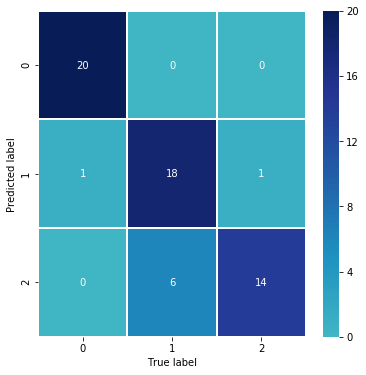

In [19]:
# show the confusion matrix of our predictions
# Confusion matrix Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = res["Predicted_Label"]
y_test = res['Actual_Label']
#class_names = validation_generator.class_indices.keys()

fig, ax =plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            linewidths=1,
            center=0,
            cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# The model is pretty clear for Saree as it is accurately predicting Saree, and also good for predicting Shirts.